In [2]:
import pandas as pd, matplotlib.pyplot as plt, pylab as pl, seaborn as sbs
libPath = 'project1/scripts'
import sys
if not libPath in sys.path: sys.path.append(libPath)
from implementations import *
# Use a subset 
df = pd.read_csv("clean_train_data.csv")[0:200]
df.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,1,0.257671,0.532835,0.474611,-1.093454,-0.870648,-0.632428,0.987313,1.378045,...,-0.156564,-0.542982,-0.660444,-0.578666,1.234399,0.251795,-0.367844,0.612965,-1.359329,-0.645152
1,100005,-1,-0.544388,-0.706350,-0.475044,0.064383,0.115251,-0.233525,0.094923,-0.819132,...,1.229416,-0.370559,1.514133,-0.239608,-1.377788,-0.354529,-0.054320,0.115912,1.711823,0.094961
2,100006,1,0.426952,-0.208400,0.719034,-0.069451,-0.971751,-0.548472,0.276686,1.219260,...,-0.799385,-0.290304,-0.660444,0.236631,0.498040,0.807823,-0.032535,0.070414,-1.520013,-0.032292
3,100011,-1,-0.132873,-0.812497,-0.068375,-1.056294,0.073553,-0.313332,-0.144736,1.150840,...,1.180350,-0.315521,1.514133,-0.441676,-0.449036,0.173863,-0.032256,0.873721,-1.141415,-0.163737
4,100023,1,0.307234,-1.123065,0.812311,0.820835,-0.273740,-0.034514,-0.011685,-0.853987,...,-0.540272,0.858731,-0.660444,1.300559,0.665238,0.789031,0.762212,-0.384076,-1.529918,0.873721


In [3]:
col_labels = df.columns.tolist()
N_FEATURES = len(col_labels) - 2
N_DATA = len(df)
N_DATA

200

In [30]:
y = np.array(df[col_labels[1]])
loss_vec = np.zeros(N_FEATURES)
loss_te_vec = np.zeros(N_FEATURES)
w_vec = np.zeros([N_FEATURES, 2])



for i in np.arange(N_FEATURES):
    x = np.array(df[col_labels[i + 2]])
    
    x_tr, y_tr, x_te, y_te = split_data(x ,y, 0.8)
    
    tx_tr = build_poly(x_tr, 1)
    tx_te = build_poly(x_te, 1)
    
    w_vec[i], loss_vec[i] = least_squares(y_tr, tx_tr)
    
    y_test = tx_te @ w_vec[i]
    y_test[y_test >= 0] = 1
    y_test[y_test < 0] = -1
    loss_te_vec[i] = (y_te - y_test) @ (y_te - y_test) 

In [31]:
loss_te_vec

array([72., 64., 80., 72., 64., 68., 60., 64., 56., 80., 60., 64., 48.,
       68., 68., 56., 64., 68., 64., 68., 64., 68., 52., 80., 80., 72.,
       64., 68., 64., 80.])

In [127]:
col_labels[np.argmin(loss_te_vec)]

'DER_pt_ratio_lep_tau'

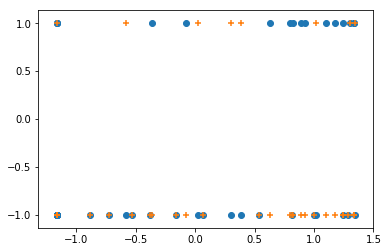

In [32]:
x = np.array(df[col_labels[np.argmin(loss_te_vec) + 2]])

tx_tr = build_poly(x_tr, 1)
tx_te = build_poly(x_te, 1)
x_tr, y_tr, x_te, y_te = split_data(x ,y, 0.8)

y_test = tx_te @ w_vec[np.argmin(loss_te_vec) ]
y_test[y_test >= 0] = 1
y_test[y_test < 0] = -1

plt.scatter(x_te,y_te)
plt.scatter(x_te,y_test, marker='+')

In [33]:
w_vec[np.argmin(loss_te_vec)]

array([-0.08857582,  0.20305   ])

In [135]:
queue = np.delete(np.arange(N_FEATURES), 12)
x0 = np.array(df[col_labels[12 + 2]])[:,np.newaxis]
lossls0=loss_te_vec[12]

w_vec = []
loss_tr_vec = []
loss_t_vec = []


for i in queue: 
    x=np.concatenate((x0, np.array(df[col_labels[2+i]])[:,np.newaxis]), axis=1)
    print('single feature loss', loss_te_vec[i])
    x_tr, y_tr, x_te, y_te = split_data(x ,y, 0.8)
    
    tx_tr = build_poly(x_tr, 1)
    tx_te = build_poly(x_te, 1)
    wls, lossls = least_squares(y_tr, tx_tr)
    w_vec.append(wls)
    loss_tr_vec.append(lossls)
    
    y_test = tx_te @ wls
    y_test[y_test >= 0] = 1
    y_test[y_test < 0] = -1
    loss_te = (y_te - y_test) @ (y_te - y_test)
    loss_t_vec.append(loss_te)
    print('combined feature loss',i, loss_te)
    lossls0 = loss_te
    


single feature loss 72.0
combined feature loss 0 52.0
single feature loss 64.0
combined feature loss 1 56.0
single feature loss 80.0
combined feature loss 2 52.0
single feature loss 72.0
combined feature loss 3 64.0
single feature loss 64.0
combined feature loss 4 48.0
single feature loss 68.0
combined feature loss 5 60.0
single feature loss 60.0
combined feature loss 6 48.0
single feature loss 64.0
combined feature loss 7 44.0
single feature loss 56.0
combined feature loss 8 44.0
single feature loss 80.0
combined feature loss 9 72.0
single feature loss 60.0
combined feature loss 10 56.0
single feature loss 64.0
combined feature loss 11 52.0
single feature loss 68.0
combined feature loss 13 48.0
single feature loss 68.0
combined feature loss 14 48.0
single feature loss 56.0
combined feature loss 15 64.0
single feature loss 64.0
combined feature loss 16 48.0
single feature loss 68.0
combined feature loss 17 44.0
single feature loss 64.0
combined feature loss 18 48.0
single feature loss 

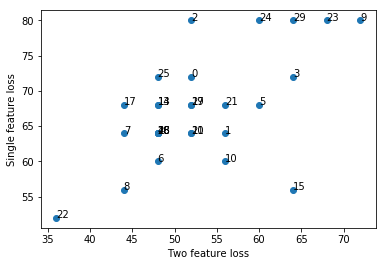

In [147]:
loss_te_vec_aux = np.delete(loss_te_vec,12)
plt.scatter(loss_t_vec,loss_te_vec_aux)
plt.xlabel('Two feature loss')
plt.ylabel('Single feature loss')
for i in np.arange(30):
    if i>12:
        plt.annotate(i, (loss_t_vec[i-1], loss_te_vec_aux[i-1]))
    if i<12:
        plt.annotate(i, (loss_t_vec[i], loss_te_vec_aux[i]))
plt.savefig('Figures/2featureloss.png')



# Playing with polynomial degrees

In [155]:
features=np.array([2, 6, 9, 11, 12, 13, 14, 18, 23, 26])-1
features

array([ 1,  5,  8, 10, 11, 12, 13, 17, 22, 25])

In [157]:
for feat in features:
    


TypeError: list indices must be integers or slices, not tuple